In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import *
import networkx as nx
from scipy.stats import beta
import time
from numpy.linalg import eigh

In [2]:
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G, weight=None).todense()
n = np.size(A, axis=0)

In [3]:
x0 = np.zeros(n)
x0[random.randrange(n)] = 1

gamma = 1
nu = eigh(A)[0][-1]
b = 2*gamma/nu

# simple contagion
nsamples = 20000

sc = lambda nu, b: 1 - (1 - b) ** nu
c = sc(np.arange(n), b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100)

p_c = np.ones((2, n))
p_rho = np.array([2, 5])

rho0 = beta(p_rho[0], p_rho[1]).rvs()
A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
samples1, l = infer_adjacency_matrix(x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=10, return_likelihood=True)

Acceptance ratio is 0.038601930096504825


plot 0 finished
plot 1000 finished
plot 2000 finished
plot 3000 finished
plot 4000 finished
plot 5000 finished
plot 6000 finished
plot 7000 finished
plot 8000 finished
plot 9000 finished


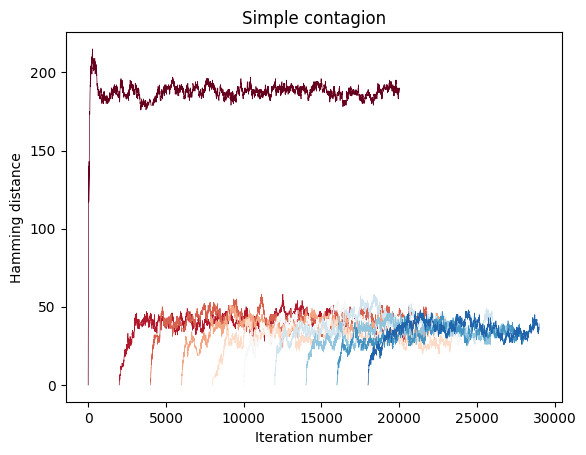

In [4]:
plt.figure()
for i in range(0, int(len(samples1)/2), 1000):
    h = []
    idx = []
    for j in range(i, len(samples1)):
        h.append(hamming_distance(samples1[i], samples1[j]))
        idx.append(i + j)
    plt.plot(idx, h, label=f"Distance from iteration {i}", linewidth=0.5, color=plt.cm.RdBu((2*i/len(samples1))))
    print(f"plot {i} finished")
plt.title("Simple contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")
plt.savefig("Figures/simple_contagion_distances.png", dpi=1000)
plt.savefig("Figures/simple_contagion_distances.pdf", dpi=1000)

In [5]:
# threshold contagion
nsamples = 20000

tau = 3
cc = lambda nu, tau, beta: beta * (nu >= tau) 
c = cc(np.arange(n), tau, b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100, random_seed=None)

p_c = np.ones((2, n))
p_rho = np.array([2, 5])

rho0 = beta(p_rho[0], p_rho[1]).rvs()

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
samples2, l = infer_adjacency_matrix(x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=10, return_likelihood=True)


0.5775698708625275
Acceptance ratio is 0.4786489324466223


plot 0 finished
plot 1000 finished
plot 2000 finished
plot 3000 finished
plot 4000 finished
plot 5000 finished
plot 6000 finished
plot 7000 finished
plot 8000 finished
plot 9000 finished


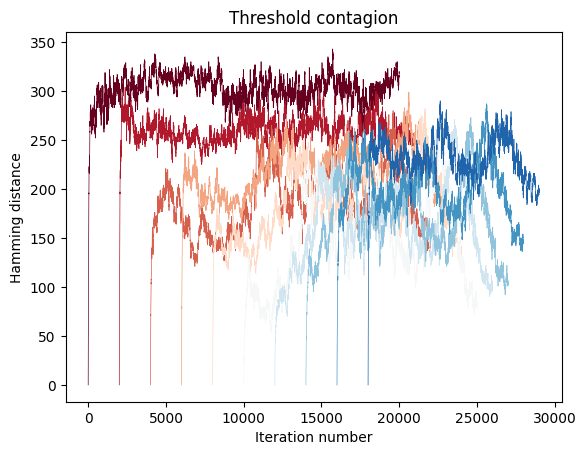

In [6]:
plt.figure()
for i in range(0, int(len(samples2)/2), 1000):
    h = []
    idx = []
    for j in range(i, len(samples2)):
        h.append(hamming_distance(samples2[i], samples2[j]))
        idx.append(i + j)
    plt.plot(idx, h, label=f"Distance from iteration {i}", linewidth=0.5, color=plt.cm.RdBu((2*i/len(samples2))))
    print(f"plot {i} finished")
plt.title("Threshold contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")
plt.savefig("Figures/threshold_contagion_distances.png", dpi=1000)
plt.savefig("Figures/threshold_contagion_distances.pdf", dpi=1000)